## Name and ID

Name: Shaohong Luo 

ID:1408604

## HW04 Code


You will complete the following notebook, as described in the PDF for Homework 04 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](piazza.com/tufts/spring2021/comp135).

#### Import required libraries

In [1]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

from MLPClassifierWithSolverLBFGS import MLPClassifierLBFGS

from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

%matplotlib inline

#### Load data

In [2]:
# Load data
x_tr_N2 = np.loadtxt('x_train.csv', skiprows=1, delimiter=',')
x_te_N2 = np.loadtxt('x_test.csv', skiprows=1, delimiter=',')

y_tr_N = np.loadtxt('y_train.csv', skiprows=1, delimiter=',')
y_te_N = np.loadtxt('y_test.csv', skiprows=1, delimiter=',')

assert x_tr_N2.shape[0] == y_tr_N.shape[0]
assert x_te_N2.shape[0] == y_te_N.shape[0]

### Problem 1: MLP size [2] with activation ReLU and L-BFGS solver

In [3]:
# TODO edit this block to run from 16 different random_states
# Save each run's trained classifier object in a list

import joblib
import pickle
a = list()
n_runs = 16
for i in range(n_runs):
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    
    s = pickle.dumps(mlp_lbfgs)
    a.append(s)
    
    print('finished LBFGS run %2d/%d after %6.5f sec | %2d iters | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))


'''
n_runs = 16
a = list()
for i in range(0,16):
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifierLBFGS(
    hidden_layer_sizes=[2],
    activation='relu',
    alpha=0.0001,
    max_iter=200, tol=1e-6,
    random_state=i,
    )
    s = pickle.dumps(mlp_lbfgs)
    a.append(s)
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))
'''


finished LBFGS run  1/16 after 0.09045 sec | 29 iters | converged    | loss 0.347
finished LBFGS run  2/16 after 0.04686 sec | 30 iters | converged    | loss 0.477
finished LBFGS run  3/16 after 0.01562 sec | 21 iters | converged    | loss 0.347
finished LBFGS run  4/16 after 0.01562 sec | 35 iters | converged    | loss 0.347
finished LBFGS run  5/16 after 0.03124 sec | 29 iters | converged    | loss 0.347
finished LBFGS run  6/16 after 0.03124 sec | 29 iters | converged    | loss 0.000
finished LBFGS run  7/16 after 0.01562 sec | 23 iters | converged    | loss 0.000
finished LBFGS run  8/16 after 0.03124 sec | 37 iters | converged    | loss 0.347
finished LBFGS run  9/16 after 0.05213 sec | 15 iters | converged    | loss 0.347
finished LBFGS run 10/16 after 0.02194 sec | 26 iters | converged    | loss 0.000
finished LBFGS run 11/16 after 0.05087 sec | 36 iters | converged    | loss 0.347
finished LBFGS run 12/16 after 0.03191 sec | 27 iters | converged    | loss 0.477
finished LBFGS r

"\nn_runs = 16\na = list()\nfor i in range(0,16):\n    start_time_sec = time.time()\n    mlp_lbfgs = MLPClassifierLBFGS(\n    hidden_layer_sizes=[2],\n    activation='relu',\n    alpha=0.0001,\n    max_iter=200, tol=1e-6,\n    random_state=i,\n    )\n    s = pickle.dumps(mlp_lbfgs)\n    a.append(s)\n    with warnings.catch_warnings(record=True) as warn_list:\n        mlp_lbfgs.fit(x_tr_N2, y_tr_N)\n    elapsed_time_sec = time.time() - start_time_sec\n    print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (\n        i+1, n_runs, elapsed_time_sec,\n        len(mlp_lbfgs.loss_curve_),\n        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',\n        mlp_lbfgs.loss_))\n"

#### 1 (a): Visualize probabilistic predictions in 2D feature space for ReLU + L-BFGS

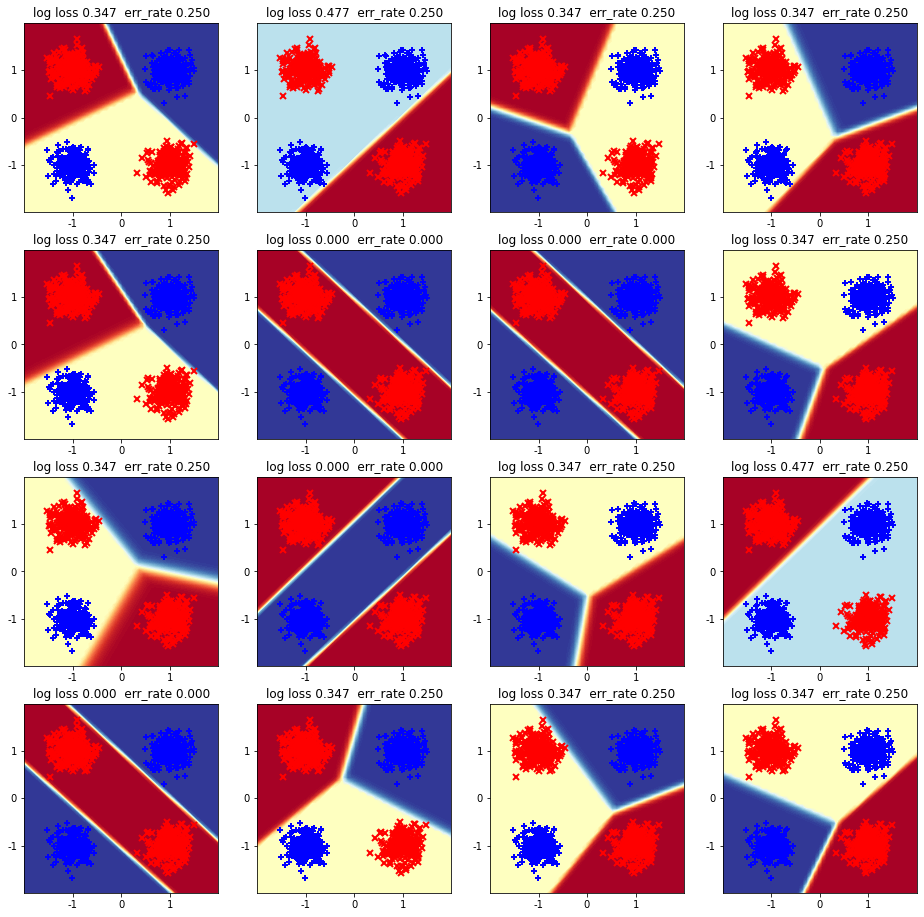

In [4]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16)) 
for i in range(n_runs):
    if(i<4):
        plot_pretty_probabilities_for_clf(pickle.loads(a[i]), x_tr_N2, y_tr_N, ax=ax_grid[0,i])
    elif((i>3) and (i<8)):
        plot_pretty_probabilities_for_clf(pickle.loads(a[i]), x_tr_N2, y_tr_N, ax=ax_grid[1,i-4])
    elif((i>7) and (i<12)):
        plot_pretty_probabilities_for_clf(pickle.loads(a[i]), x_tr_N2, y_tr_N, ax=ax_grid[2,i-8])
    elif(i<16): 
        plot_pretty_probabilities_for_clf(pickle.loads(a[i]), x_tr_N2, y_tr_N, ax=ax_grid[3,i-12])

#### 1 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 1/4 reach 0 training error. The other error rate are all 0.25. The converge is very fast which take less than 0.05sec and averaged 25 iterations.

### Problem 2: MLP size [2] with activation Logistic and L-BFGS solver


In [5]:
# TODO edit this block to run 16 different random_state models with LOGISTIC activation
import joblib
b = list()
n_runs = 16
for i in range(n_runs):
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    
    s = pickle.dumps(mlp_lbfgs)
    b.append(s)
    
    print('finished LBFGS run %2d/%d after %6.5f sec | %3d iters | %s | loss %.3f' % (
    i+1, n_runs, elapsed_time_sec,
    len(mlp_lbfgs.loss_curve_),
    'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
    mlp_lbfgs.loss_))
    
# Save each run's trained classifier object in a list


finished LBFGS run  1/16 after 0.04787 sec |  56 iters | converged    | loss 0.000
finished LBFGS run  2/16 after 0.06084 sec | 114 iters | converged    | loss 0.347
finished LBFGS run  3/16 after 0.03590 sec |  45 iters | converged    | loss 0.347
finished LBFGS run  4/16 after 0.06583 sec |  76 iters | converged    | loss 0.000
finished LBFGS run  5/16 after 0.03291 sec |  40 iters | converged    | loss 0.477
finished LBFGS run  6/16 after 0.02693 sec |  42 iters | converged    | loss 0.000
finished LBFGS run  7/16 after 0.03192 sec |  50 iters | converged    | loss 0.000
finished LBFGS run  8/16 after 0.03690 sec |  42 iters | converged    | loss 0.477
finished LBFGS run  9/16 after 0.03391 sec |  62 iters | converged    | loss 0.347
finished LBFGS run 10/16 after 0.06483 sec | 115 iters | converged    | loss 0.347
finished LBFGS run 11/16 after 0.05984 sec |  83 iters | converged    | loss 0.347
finished LBFGS run 12/16 after 0.09076 sec | 107 iters | converged    | loss 0.347
fini

#### 2 (a): Visualize probabilistic predictions in 2D feature space for Logistic Sigmoid + L-BFGS

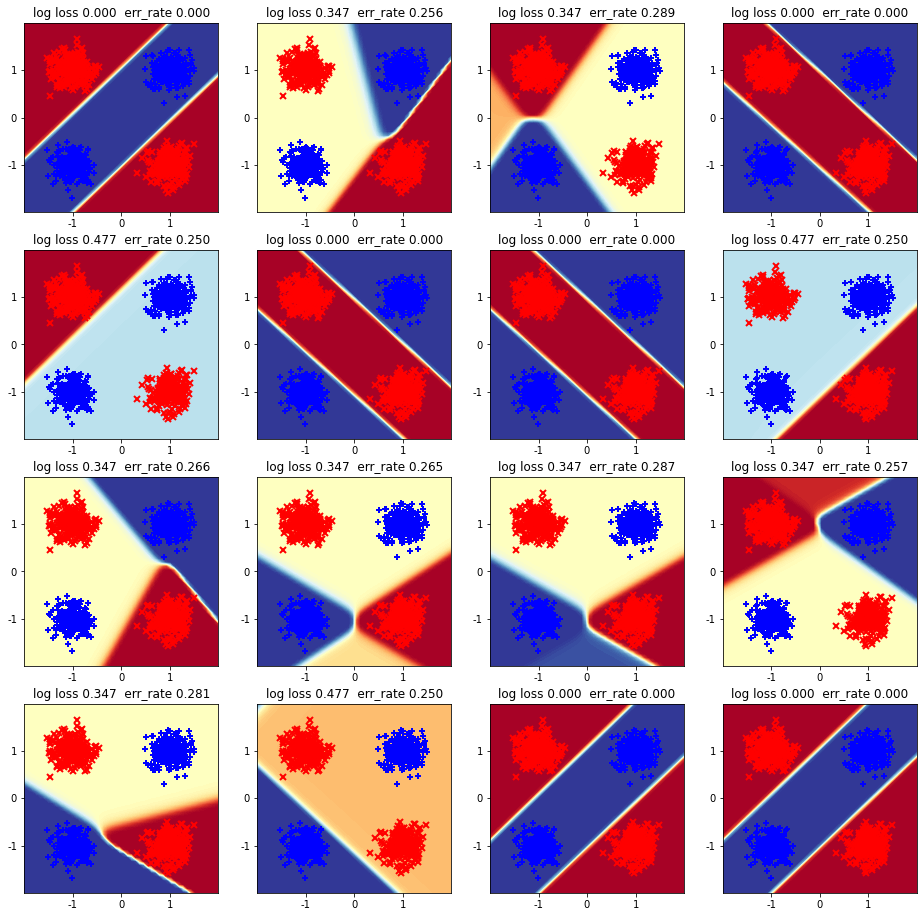

In [6]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i in range(n_runs):
    if(i<4):
        plot_pretty_probabilities_for_clf(pickle.loads(b[i]), x_tr_N2, y_tr_N, ax=ax_grid[0,i])
    elif((i>3) and (i<8)):
        plot_pretty_probabilities_for_clf(pickle.loads(b[i]), x_tr_N2, y_tr_N, ax=ax_grid[1,i-4])
    elif((i>7) and (i<12)):
        plot_pretty_probabilities_for_clf(pickle.loads(b[i]), x_tr_N2, y_tr_N, ax=ax_grid[2,i-8])
    elif(i<16): 
        plot_pretty_probabilities_for_clf(pickle.loads(b[i]), x_tr_N2, y_tr_N, ax=ax_grid[3,i-12])

#### 2 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**:  6/16 reach 0 training error. The other has loss 0.250,0.257,0.281,0.266,0.265,0.289. The converge is still fast which take less than 0.1sec and most of them less then 100 iters. But a little slower than the first case, which use 'RELU' as the activation function.

### Problem 3: MLP size [2] with activation ReLU and SGD solver

In [7]:
# TODO edit this block to do 16 different runs (each with different random_state value)
# Save each run's trained classifier object in a list 
c = list()
n_runs = 16
for i in range(n_runs):
    start_time_sec = time.time()
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=i,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    
    s = pickle.dumps(mlp_sgd)
    c.append(s)
    
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))


finished SGD run  1/16 after    5.1 sec | 267 epochs | converged     | loss 0.347
finished SGD run  2/16 after    5.7 sec | 307 epochs | converged     | loss 0.478
finished SGD run  3/16 after    4.6 sec | 239 epochs | converged     | loss 0.347
finished SGD run  4/16 after    7.7 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  5/16 after    5.3 sec | 275 epochs | converged     | loss 0.347
finished SGD run  6/16 after    7.6 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  7/16 after    7.6 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  8/16 after    5.2 sec | 273 epochs | converged     | loss 0.347
finished SGD run  9/16 after    4.2 sec | 219 epochs | converged     | loss 0.347
finished SGD run 10/16 after    7.6 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run 11/16 after    7.6 sec | 394 epochs | converged     | loss 0.478
finished SGD run 12/16 after    7.6 sec | 400 epochs | NOT converged | loss 0.478
finished SGD run

#### 3 (a): Visualize probabilistic predictions in 2D feature space for ReLU + SGD

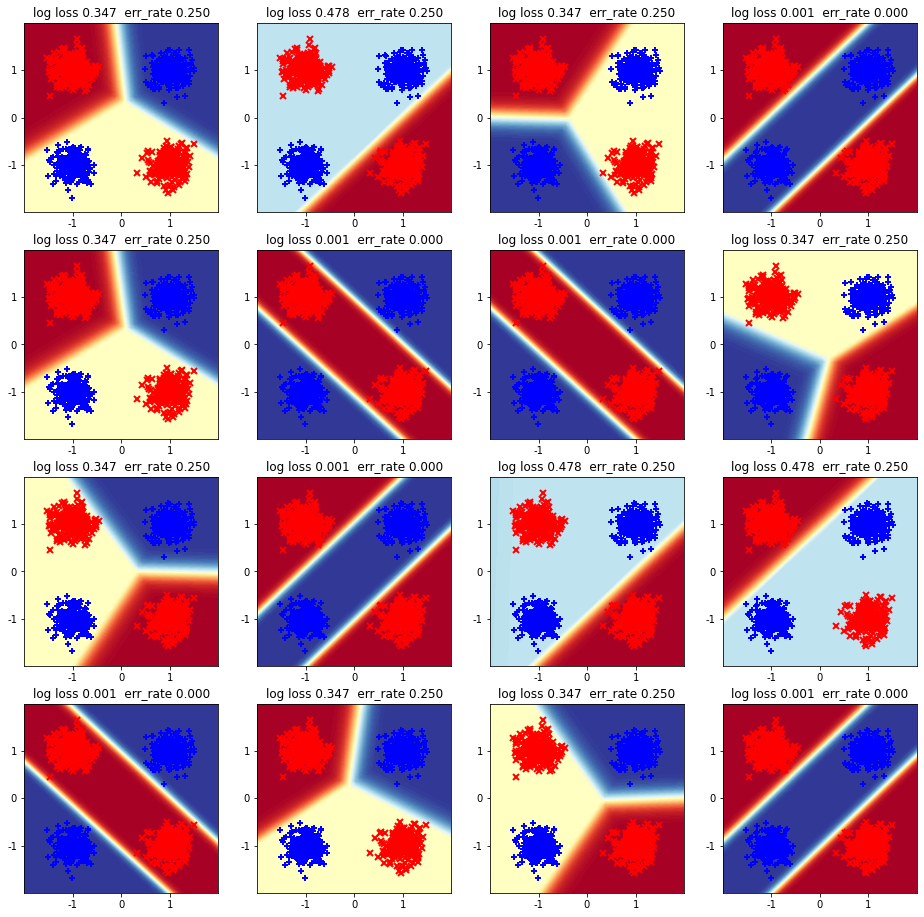

In [8]:
# TODO edit to plot all 16 runs from above

fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i in range(n_runs):
    if(i<4):
        plot_pretty_probabilities_for_clf(pickle.loads(c[i]), x_tr_N2, y_tr_N, ax=ax_grid[0,i])
    elif((i>3) and (i<8)):
        plot_pretty_probabilities_for_clf(pickle.loads(c[i]), x_tr_N2, y_tr_N, ax=ax_grid[1,i-4])
    elif((i>7) and (i<12)):
        plot_pretty_probabilities_for_clf(pickle.loads(c[i]), x_tr_N2, y_tr_N, ax=ax_grid[2,i-8])
    elif(i<16): 
        plot_pretty_probabilities_for_clf(pickle.loads(c[i]), x_tr_N2, y_tr_N, ax=ax_grid[3,i-12])

#### 3 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

 **Answer**: 3/8. The other all has error rate 0.25. The converge is slower than using 'L-BFGS' solver. In detail, the average the it cost is nearly 6 sec, which is approximately 100 times higher than using 'L-BFGS' solver. Besides, 7/16 of it does not converge, while all the test of 'L-BFGS' converge.

#### 3 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS in part 1 (using the same ReLU activation function)?  Why, do you believe, these differences exist?

**Answer**: The running time is quite higher and the radio of convergence is quite lower, however the error rate of SGD is a little lower tha 'L-BFGS'. There are some reasons.  
1. There are so many hyperparameter in SGD, in this case, we give use a fixed hyperparameter and don't tune it. We don't know whether it is the optimal one.  
2. With the assistance of a linear search procedure, L-BFGS is usually more stable than SGD.
3. L-BFGS can handle large batch sizes well.

### Problem 4: MLP size [2] with activation Logistic and SGD solver

In [9]:
# TODO edit to do 16 runs of SGD, like in previous step, but with LOGISTIC activation
d = list()
n_runs = 16
for i in range(n_runs):
    start_time_sec = time.time()
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=i,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    
    s = pickle.dumps(mlp_sgd)
    d.append(s)
    
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))

finished SGD run  1/16 after    3.2 sec | 161 epochs | converged     | loss 0.693
finished SGD run  2/16 after    7.8 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  3/16 after    7.6 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  4/16 after    4.1 sec | 215 epochs | converged     | loss 0.693
finished SGD run  5/16 after    7.6 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  6/16 after    7.6 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  7/16 after    7.5 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  8/16 after    7.5 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  9/16 after    7.5 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run 10/16 after    7.4 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run 11/16 after    2.3 sec | 124 epochs | converged     | loss 0.693
finished SGD run 12/16 after    7.5 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run

#### 4(a): Visualize probabilistic predictions in 2D feature space for Logistic + SGD

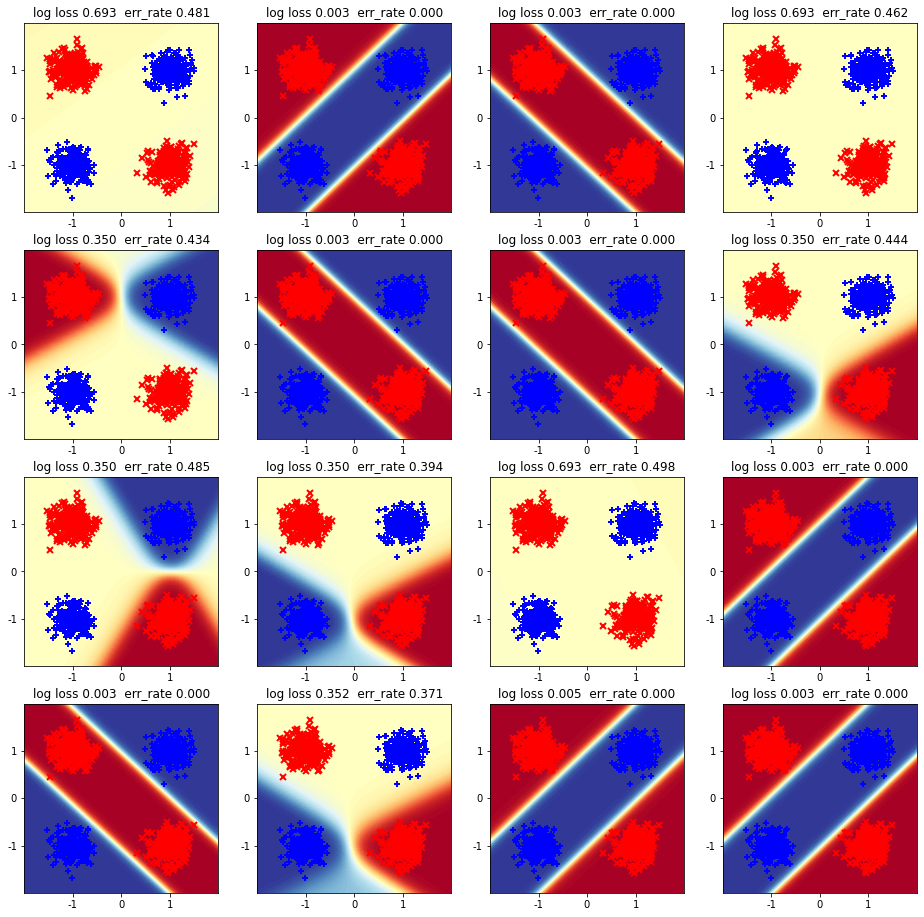

In [10]:
# TODO edit to plot all 16 runs from previous step
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i in range(n_runs):
    if(i<4):
        plot_pretty_probabilities_for_clf(pickle.loads(d[i]), x_tr_N2, y_tr_N, ax=ax_grid[0,i])
    elif((i>3) and (i<8)):
        plot_pretty_probabilities_for_clf(pickle.loads(d[i]), x_tr_N2, y_tr_N, ax=ax_grid[1,i-4])
    elif((i>7) and (i<12)):
        plot_pretty_probabilities_for_clf(pickle.loads(d[i]), x_tr_N2, y_tr_N, ax=ax_grid[2,i-8])
    elif(i<16): 
        plot_pretty_probabilities_for_clf(pickle.loads(d[i]), x_tr_N2, y_tr_N, ax=ax_grid[3,i-12])

#### 4 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 1/2. The other has error rate 0.371,0.394,0.485,0.444,0.462,0.481,0.434,0.498. The converge is slower than using 'L-BFGS' solver and even slower than using SGD with 'RELU'. In detail, the average the it cost is nearly 7 sec. Besides, 13/16 of it does not converge.

#### 4 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS runs in part 2 (using the same logistic activation function)?  Why, do you believe, these differences exist?

**Answer**: The running time is quite higher and the radio of convergence is quite lower, however the error rate of SGD is a little lower tha 'L-BFGS'. There are some reasons.  
1. There are so many hyperparameter in SGD, in this case, we give use a fixed hyperparameter and don't tune it. We don't know whether it is the optimal one.  
2. With the assistance of a linear search procedure, L-BFGS is usually more stable than SGD.
3. L-BFGS can handle large batch sizes well.

### Problem 5: Comparing loss_curves

#### 5 (a): Plot loss_curves for each method in 2 x 2 subplot grid

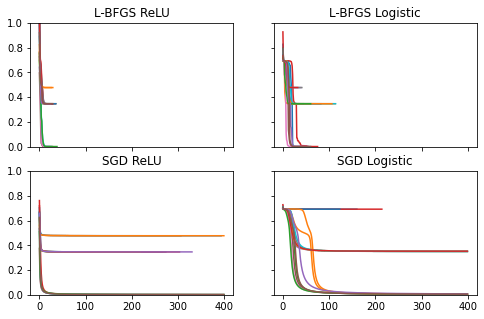

In [12]:
fig, ax_grid = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,5))

# TODO plot 16 curves for each of the 2x2 settings of solver and activation
ax_grid[0,0].set_title('L-BFGS ReLU')
for i in range(n_runs):
    curve1 = pickle.loads(a[i]).loss_curve_
    ax_grid[0, 0].plot(curve1)
    plt.ylim([0, 1.0]);


ax_grid[0,1].set_title('L-BFGS Logistic')
for i in range(n_runs):  
    curve2 = pickle.loads(b[i]).loss_curve_
    ax_grid[0, 1].plot(curve2)
    plt.ylim([0, 1.0]);


ax_grid[1,0].set_title('SGD ReLU')
for i in range(n_runs):     
    curve3 = pickle.loads(c[i]).loss_curve_
    ax_grid[1, 0].plot(curve3)
    plt.ylim([0, 1.0]);
    
ax_grid[1,1].set_title('SGD Logistic')
for i in range(n_runs): 
    curve4 = pickle.loads(d[i]).loss_curve_
    ax_grid[1,1].plot(curve4)
    plt.ylim([0, 1.0]); # keep this y limit so it's easy to compare across plots

#### 5 (b): From this overview plot (plus your detailed plots from prior steps), which activation function seems easier to optimize, the ReLU or the Logistic Sigmoid?  Which requires most iterations in general?

**Answer:** The L-BFGS ReLU seems easier to optimize and the SGD logistics requires most iterations in general.

#### 5 (c): Are you convinced that one activation function is always easier to optimize? Suggest 3 additional experimental comparisons that would be informative.

**Answer**: NO.  
1. Try to use another optimization algorithm in certain activation function. e.g. Use 'Adam' and use 'ReLU' activation function to the same dataset, and observe its result.  
2. Try to have experiment on the other dataset.  
3. Try to use another hyperparameter. e.g. use different hidden layers sizes /use different learning rate(alpha).